# Beispiel Differential Privacy

Wir beginnen wieder mit unserer Abfrage zu Anzahl Kidner pro Alter.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

med_data = pd.read_excel('./data/RPAD_data_small.xlsx', engine='openpyxl')

# Funktion zur Abfrage Anzahl Kinder in einer Alterspanne (a-b)
def range_query(df, col, a, b):
    return len(df[(df[col] >= a) & (df[col] < b)])

print(f'Anzahl Kinder zwischen 9 und 12 Jahren: {range_query(med_data, "Age", 9, 12)}')

Anzahl Kinder zwischen 9 und 12 Jahren: 250


Dazu die synthetische Repräsentation:

<BarContainer object of 20 artists>

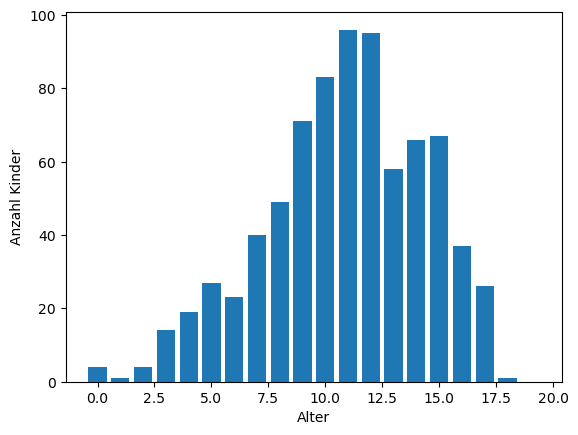

In [2]:
bins = list(range(0, 20))
counts = [range_query(med_data, "Age", b, b+1) for b in bins]
plt.xlabel('Alter')
plt.ylabel('Anzahl Kinder')
plt.bar(bins, counts)

💡Die Abfrage auf der synthetischen Repräsentation ergibt das gleich Ergebnis:

In [3]:
def range_query_synth(syn_rep, a, b):
    total = 0
    for i in range(a, b):
        total += syn_rep[i]
    return total

range_query_synth(counts, 9, 12)

250

# Abfrage mit Differential Privacy 
1. Hinzufügen von Rauschen zu jeder Beobachtung der synthetischen Repräsentation
2. Abfrage stellen

In [4]:
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity/epsilon)
    
epsilon = 1
dp_syn_rep = [laplace_mech(c, 1, epsilon) for c in counts]

range_query_synth(dp_syn_rep, 9, 12)

249.72675791201357

# Differential Privacy und synthetische Daten
Zunächst erstellen wir simple synthetische Daten.
Anzahl Kinder pro Altersgruppe normalisieren und als Wahrscheinlichkeit interpretieren  

In [5]:
dp_syn_rep_nn = np.clip(dp_syn_rep, 0, None)
syn_normalized = dp_syn_rep_nn / np.sum(dp_syn_rep_nn)
np.sum(syn_normalized)

1.0

Zufällige Stichproben aus Altersangaben ziehen, gewichtet nach der berechneten Wahrscheinlichkeit.

<BarContainer object of 20 artists>

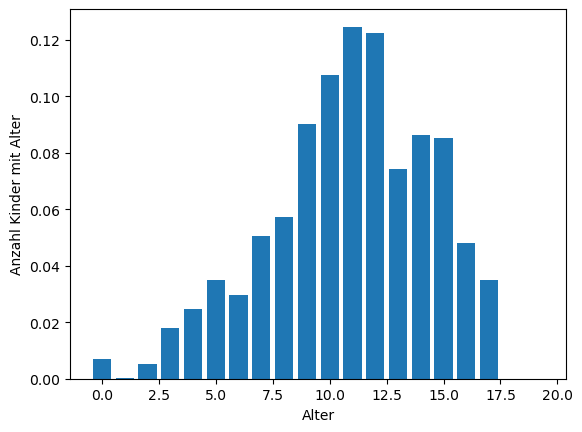

In [6]:
plt.xlabel("Alter")
plt.ylabel("Anzahl Kinder mit Alter")
plt.bar(bins, syn_normalized)

Stichprobe von 5 Werten ziehen zur Überprüfung:


In [7]:
def gen_samples(n):
    return np.random.choice(bins, n, p=syn_normalized)

syn_data = pd.DataFrame(gen_samples(5), columns=['Age'])
syn_data


,Age
0,10
1,11
2,15
3,10
4,15


Stichprobe von 1000 Werten ziehen zur Visualisierung der Verteilung.

Sind die Diagramme gleich ⁉️  


(array([  73.,    0.,   48.,  171.,  228.,  359.,  293.,  526.,  556.,
         889., 1118., 1240., 1178.,  757.,  892.,  841.,  472.,  359.,
           0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <BarContainer object of 19 artists>)

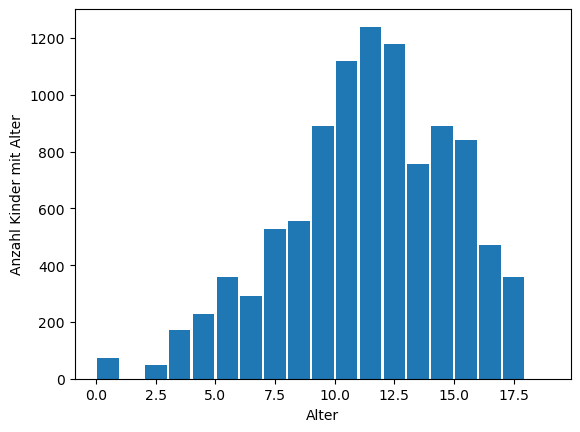

In [8]:
syn_data = pd.DataFrame(gen_samples(10000), columns=['Age'])
plt.xlabel("Alter")
plt.ylabel("Anzahl Kinder mit Alter")
plt.hist(syn_data['Age'], bins=bins, rwidth=0.90)

```{admonition} 💡 Datenschutzkonforme synthetische Daten  
Da wir mit einem Differential Privacy konformen Algorithmus die synthetischen Daten erstellt haben, halten auch die synthetischen Daten das festgesetzte Maß an Datenschutz ein.
```

Quelle und Vorlage:

A book about differential privacy, for programmers
By Joseph P. Near and Chiké Abuah